# Operaciones lógicas

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [3]:
def process_image(image_path):
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    return img

In [4]:
spot = process_image('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/spot.png')
muscle_image = process_image('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/muscle.png')

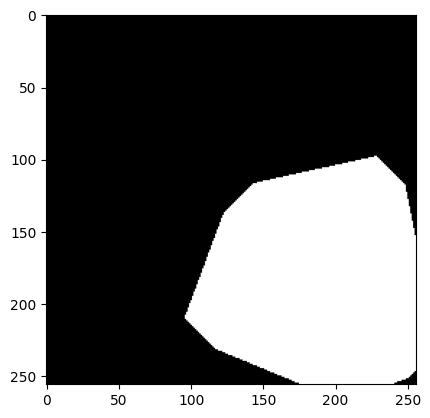

In [5]:
plt.imshow(spot)

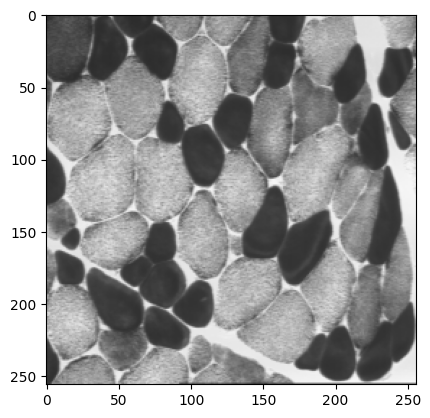

In [6]:
plt.imshow(muscle_image)

## OR, AND y XOR

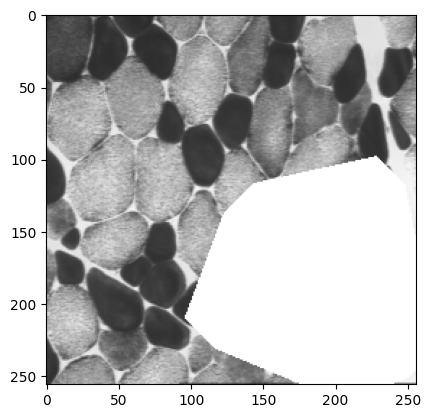

In [8]:
image_or = cv2.bitwise_or(spot, muscle_image)
plt.imshow(image_or)

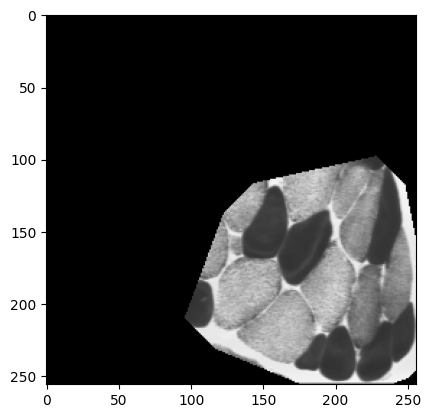

In [9]:
image_and = cv2.bitwise_and(spot, muscle_image)
plt.imshow(image_and)

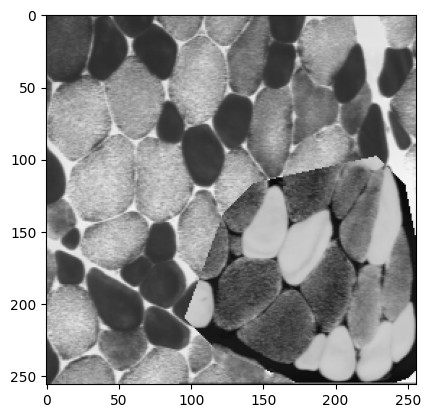

In [10]:
image_xor = cv2.bitwise_xor(spot, muscle_image)
plt.imshow(image_xor)

### ¿Cuál es su conclusión? 

En este caso podemos observar que:
- En la operación de OR se combinaron las imagenes manteniendo los pixeles mas brillantes entre las dos imagenes.
- En la operación de AND se hizo la intersección de las dos imagenes obteniendo como resultado la imagen de muscle posicionada en los pixeles brillantes de la imagen de spot.
- En la operación de XOR se realizo una intersección manteniendo los pixeles brillantes de la imagen de spot en la imagen de muscle.

## OR, AND y XOR Invertido

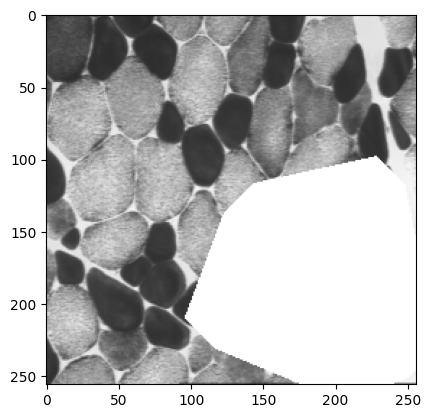

In [8]:
image_or = cv2.bitwise_or(muscle_image, spot)
plt.imshow(image_or)

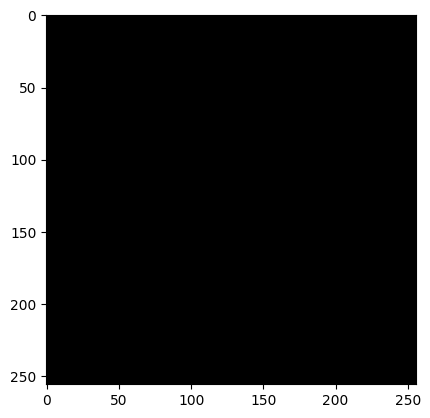

In [13]:
image_and = cv2.bitwise_and(muscle_image, spot)
plt.imshow(image_and)

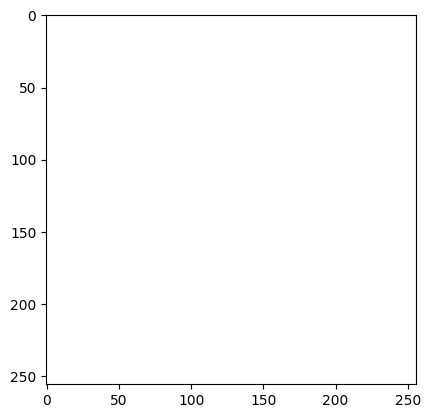

In [14]:
image_xor = cv2.bitwise_xor(muscle_image, spot)
plt.imshow(image_xor)

### ¿Cuál es su conclusión? 

En este caso podemos observar que:
- En la operación de OR se combinaron las imagenes manteniendo los pixeles mas brillantes entre las dos imagenes.
- En la operación de AND se hizo la intersección de las dos imagenes obteniendo como resultado una fondo de pixeles oscuros.
- En la operación de XOR se hizo una intersección entre las dos imagenes obteniendo como resultado un fondo blanco.

Aplique la operación NOT sobre la imagen muscle.png. La operación NOT puede realizarse a través de la operación XOR. Para esto se utiliza una imagen constante de valor máximo (255) y se efectúa la operación XOR con la imagen original (NOT = 255 XOR I).  Explique el resultado y visualícelo.

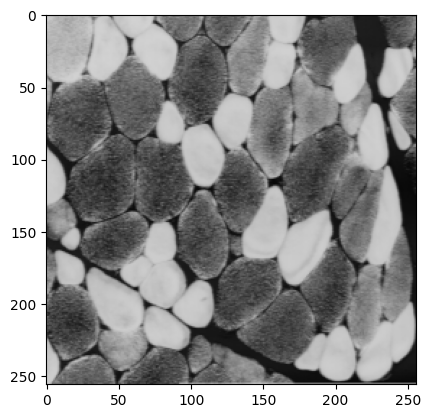

In [7]:
constant_image = np.full_like(muscle_image , 255)
image_not = cv2.bitwise_xor(muscle_image, constant_image)

plt.imshow(image_not)

### Explicación

En este caso, al aplicar la operación NOT, el fondo de la imagen muscle cambió de blanco a negro debido a que la imagen constante utilizada en la operación era completamente blanca (valor 255). Como resultado, cada píxel de la imagen original se invirtió, transformando las áreas claras en oscura.

In [27]:
_, binary_mask = cv2.threshold(spot, 128, 255, cv2.THRESH_BINARY)

bit_mask = 192

modified_region = cv2.bitwise_and(muscle_image, bit_mask)

result_image = np.where(binary_mask == 255, modified_region, muscle_image)

values = np.unique(result_image[binary_mask == 255])

print(values)


[  0  64 128 192]


### Explicación

Para realizar la operación,
- Primero se creo una mascara binaria usando la imagen de spot y conviertiendo los valores mayores o iguales a 128 en blanco y los menos a 128 conviertiendolos a negro,
- Segundo se creo una bitmask para modificar los valores de intensidad 
- Tercero, se aplica la operación de bitwise and para conservar los bits en 1 redunciendo la intensidad y manteniendo los bits mas significativos
- Cuarto, se aplica la modificación en la mascara binaria y se aplican los cambios sobre las regiones blancas.
- Por ultimo, se obtienen los valores unicos en la parte alterada de la imagen